In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = "{:,.2f}".format
plt.style.use('fivethirtyeight') 

In [2]:
filepath = r'C:\Users\Alexander\Desktop\neuefische\Fourth Week 16.09 - 20.09\hh_analytics_24_2_ATSS\data\Muesli Project raw data.xlsx'
Muesli = pd.read_excel(filepath, index_col=None)
Muesli1 = pd.read_excel(filepath, sheet_name='Campaign Data')
Muesli2 = pd.read_excel(filepath, sheet_name='Order Process Data')
Muesli3 = pd.read_excel(filepath, sheet_name='InternData Study')




In [3]:

# Display the first few rows of the DataFrame
Muesli.head()
Muesli.columns
Muesli.shape
Muesli.info

<bound method DataFrame.info of       Index        Order ID Order Date       Ship Mode Customer ID  \
0        27  CA-2019-121755 2019-01-16    Second Class    EH-13945   
1        45  CA-2019-118255 2019-03-11     First Class    ON-18715   
2        48  CA-2019-169194 2019-06-20  Standard Class    LH-16900   
3        60  CA-2019-111682 2019-06-17     First Class    TB-21055   
4        63  CA-2018-135545 2018-11-24  Standard Class    KM-16720   
...     ...             ...        ...             ...         ...   
9989   9894  US-2019-115441 2019-07-25    Second Class    SH-19975   
9990   9908  US-2018-129007 2018-09-13     First Class    KD-16615   
9991   9913  CA-2018-132388 2018-10-10     First Class    KN-16390   
9992   9920  CA-2019-149272 2019-03-15  Standard Class    MY-18295   
9993   9948  CA-2020-121559 2020-06-01    Second Class    HW-14935   

          Customer Name Origin Channel Country/Region           City  \
0         Eric Hoffmann          Email  United States  

In [4]:
#cleaning Ship Mode
Muesli['Ship Mode'] = Muesli['Ship Mode'].replace({
    "Standard Class": "Standard Shipping",
    "Second Class": "Standard Shipping",
    "First Class": "Express Shipping"
})

#cleaning duplicates in Muesli = "Order"
Muesli["Order ID"].duplicated().value_counts()
duplicates = Muesli[Muesli["Order ID"].duplicated(keep=False)]
Muesli = Muesli.drop_duplicates(subset=["Order ID"], keep='first')


#cleaning duplicates in Muesli2 = "Order Process Data" (probably because of more than 1 item per order)
#Muesli_cleaned = Muesli.dropna(how='all')
Muesli2["Order ID"].duplicated().value_counts()
duplicates2 = Muesli2[Muesli2["Order ID"].duplicated(keep=False)]
Muesli2 = Muesli2.drop_duplicates(subset=["Order ID"], keep='first')


#cleaning duplicates in Muesli2 = "InternData Study"
Muesli3["Order ID"].duplicated().value_counts()
duplicates3 = Muesli3[Muesli3["Order ID"].duplicated(keep=False)]
Muesli3 = Muesli3.drop_duplicates(subset=["Order ID"], keep='first')

In [17]:
#cleaning -> drop not needed columns

# List of columns to drop if they exist
columns_to_drop = ["Index", "Country/Region", "City", "State", "Postal Code", 
                   "Region", "Category", "Sub-Category", "Product ID", 
                   "Sales", "Quantity", "Discount", "Profit"]

# Drop columns only if they exist in the DataFrame
Muesli.drop([col for col in columns_to_drop if col in Muesli.columns], axis=1, inplace=True)


In [6]:
#Merge everything together on Order ID

# Merge with outer join and suffixes to manage column name conflicts
merged_1 = pd.merge(Muesli, Muesli1, on="Order ID", how="outer", suffixes=('', '_Muesli1'))
merged_2 = pd.merge(merged_1, Muesli2, on="Order ID", how="outer", suffixes=('', '_Muesli2'))
final_merged = pd.merge(merged_2, Muesli3, on="Order ID", how="outer", suffixes=('', '_Muesli3'))
Muesli=final_merged
# Display the resulting DataFrame's columns
print(final_merged.columns)


Index(['Order ID', 'Order Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Origin Channel', 'Arrival Scan Date', 'Customer Name_Muesli1',
       'Row ID', 'Order Date_Muesli2', 'On Truck Scan Date',
       'Ship Mode_Muesli2', 'Ready to Ship Date', 'Pickup Date'],
      dtype='object')


In [7]:
columns_to_drop2 = ["Customer ID", "Customer Name", "Customer Name_Muesli1", "Origin Channel", "Row ID", "Order Date_Muesli2", "Ship Mode_Muesli2"]
Muesli.drop([col for col in columns_to_drop2 if col in Muesli.columns], axis=1, inplace=True)


In [8]:
Muesli['Order Date'] = pd.to_datetime(Muesli['Order Date'], format='%Y-%m-%d')
Muesli['Arrival Scan Date'] = pd.to_datetime(Muesli['Arrival Scan Date'], format='%d-%m-%Y')
Muesli['On Truck Scan Date'] = pd.to_datetime(Muesli['On Truck Scan Date'], format='%Y-%m-%d')
Muesli['Ready to Ship Date'] = pd.to_datetime(Muesli['Ready to Ship Date'], format='%Y-%m-%dT%H:%M:%S.%fZ')
Muesli['Pickup Date'] = pd.to_datetime(Muesli['Pickup Date'])
Muesli.sample(10)

,Order ID,Order Date,Ship Mode,Arrival Scan Date,On Truck Scan Date,Ready to Ship Date,Pickup Date
4096,CA-2020-164819,2020-10-15,Standard Shipping,NaT,2020-10-21,NaT,NaT
3908,CA-2020-155607,2020-11-26,Standard Shipping,NaT,2020-12-02,2020-11-30,2020-12-02
4258,US-2017-127978,2017-03-03,Standard Shipping,NaT,NaT,NaT,NaT
1858,CA-2019-110499,2019-04-07,Express Shipping,NaT,2019-04-10,NaT,NaT
3313,CA-2020-125290,2020-11-06,Standard Shipping,NaT,2020-11-12,2020-11-10,2020-11-12
420,CA-2017-133704,2017-09-20,Standard Shipping,NaT,NaT,NaT,NaT
4023,CA-2020-161200,2020-08-06,Standard Shipping,NaT,2020-08-12,NaT,NaT
2702,CA-2019-163804,2019-12-02,Standard Shipping,NaT,2019-12-11,NaT,NaT
2938,CA-2020-106047,2020-07-12,Standard Shipping,NaT,2020-07-22,NaT,NaT
2460,CA-2019-149272,2019-03-15,Standard Shipping,NaT,2019-03-20,NaT,NaT


In [9]:
# Add the new columns
Muesli["order_weekday"]=Muesli["Order Date"].dt.dayofweek

Muesli['Order to Scan on Truck'] =(Muesli['On Truck Scan Date'] - Muesli['Order Date']).dt.days

Muesli['Delivery Time'] = (Muesli['Arrival Scan Date'] - Muesli['Order Date']).dt.days
Muesli['Order Processing Time'] = (Muesli['Ready to Ship Date'] - Muesli['Order Date']).dt.days
Muesli['Shipping Time'] = (Muesli['Arrival Scan Date'] - Muesli['Ready to Ship Date']).dt.days
Muesli['On Truck Duration'] = (Muesli['Arrival Scan Date'] - Muesli['On Truck Scan Date']).dt.days

Muesli['Pickup Delay'] = (Muesli['Pickup Date'] - Muesli['Ready to Ship Date']).dt.days
Muesli['Total Transit Time'] = (Muesli['Arrival Scan Date'] - Muesli['Order Date']).dt.days
Muesli

,Order ID,Order Date,Ship Mode,Arrival Scan Date,On Truck Scan Date,Ready to Ship Date,Pickup Date,order_weekday,Order to Scan on Truck,Delivery Time,Order Processing Time,Shipping Time,On Truck Duration,Pickup Delay,Total Transit Time
0,CA-2017-100006,2017-09-07,Standard Shipping,NaT,NaT,NaT,NaT,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CA-2017-100090,2017-07-08,Standard Shipping,NaT,NaT,NaT,NaT,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA-2017-100293,2017-03-14,Standard Shipping,NaT,NaT,NaT,NaT,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CA-2017-100328,2017-01-28,Standard Shipping,NaT,NaT,NaT,NaT,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CA-2017-100363,2017-04-08,Standard Shipping,NaT,NaT,NaT,NaT,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5004,US-2020-168802,2020-11-03,Standard Shipping,NaT,2020-11-12,2020-11-09,2020-11-12,1,9.00,NaN,6.00,NaN,NaN,3.00,NaN
5005,US-2020-169320,2020-07-23,Standard Shipping,NaT,2020-07-29,NaT,NaT,3,6.00,NaN,NaN,NaN,NaN,NaN,NaN
5006,US-2020-169488,2020-09-07,Express Shipping,NaT,2020-09-09,NaT,NaT,0,2.00,NaN,NaN,NaN,NaN,NaN,NaN
5007,US-2020-169502,2020-08-28,Standard Shipping,NaT,2020-09-02,NaT,NaT,4,5.00,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
Muesli.describe()

,Order Date,Arrival Scan Date,On Truck Scan Date,Ready to Ship Date,Pickup Date,order_weekday,Order to Scan on Truck,Delivery Time,Order Processing Time,Shipping Time,On Truck Duration,Pickup Delay,Total Transit Time
count,5009,333,3002,204,204,"5,009.00","3,002.00",333.00,204.00,22.00,333.00,204.00,333.00
mean,2019-05-08 09:38:07.642244096,2019-10-14 19:36:12.972973056,2020-03-06 22:31:15.549633792,2020-07-07 01:03:31.764705792,2020-07-08 14:49:24.705882368,2.63,6.11,10.83,4.18,6.14,4.60,1.57,10.83
min,2017-01-03 00:00:00,2019-05-03 00:00:00,2019-01-07 00:00:00,2019-09-02 00:00:00,2019-09-03 00:00:00,0.00,0.00,3.00,0.00,5.00,1.00,0.00,3.00
25%,2018-05-31 00:00:00,2019-09-09 00:00:00,2019-09-20 00:00:00,2019-09-24 00:00:00,2019-09-25 00:00:00,1.00,5.00,9.00,3.00,6.00,4.00,1.00,9.00
50%,2019-07-10 00:00:00,2019-10-21 00:00:00,2020-03-25 00:00:00,2020-11-12 00:00:00,2020-11-13 00:00:00,3.00,7.00,11.00,4.00,6.00,5.00,2.00,11.00
75%,2020-05-19 00:00:00,2019-12-16 00:00:00,2020-09-18 00:00:00,2020-11-23 00:00:00,2020-11-25 00:00:00,4.00,8.00,13.00,6.00,7.00,5.00,2.00,13.00
max,2020-12-30 00:00:00,2020-05-15 00:00:00,2021-01-06 00:00:00,2020-12-07 00:00:00,2020-12-09 00:00:00,6.00,12.00,17.00,8.00,7.00,7.00,3.00,17.00
std,NaN,NaN,NaN,NaN,NaN,1.82,2.48,2.86,1.97,0.77,1.20,0.95,2.86


groupby shipmode
avg pickup delay for both ship modes

In [11]:
print(Muesli[['Ship Mode','Pickup Delay']].groupby('Ship Mode').mean())
print(Muesli[['Ship Mode', 'Order Processing Time']].groupby('Ship Mode').mean())
# Order Processing is also sped up a lot by Express Shipping
print(Muesli[['Ship Mode', 'Shipping Time']].groupby('Ship Mode').mean())
print(Muesli[['Ship Mode', 'Total Transit Time']].groupby('Ship Mode').mean())

#If Standard Shipping shows much higher total transit times compared to Express Shipping, it reinforces the fact that bottlenecks are occurring at multiple stages, including pickup delay, processing, and shipping.

print(Muesli[['Ship Mode', 'Pickup Delay', 'Order Processing Time', 'Shipping Time', 'Total Transit Time']].groupby('Ship Mode').std())

import matplotlib.pyplot as plt
import seaborn as sns

# Mean times for each step
mean_data = {
    'Pickup Delay': [0.40, 1.99],
    'Order Processing Time': [2.04, 4.93],
    'Shipping Time': [5.50, 6.28],
    'Total Transit Time': [7.05, 11.93]
}

# Standard deviation for each step (optional, to show variability)
std_data = {
    'Pickup Delay': [0.53, 0.68],
    'Order Processing Time': [1.69, 1.44],
    'Shipping Time': [0.58, 0.75],
    'Total Transit Time': [2.16, 1.96]
}





                   Pickup Delay
Ship Mode                      
Express Shipping           0.40
Standard Shipping          1.99
                   Order Processing Time
Ship Mode                               
Express Shipping                    2.04
Standard Shipping                   4.93
                   Shipping Time
Ship Mode                       
Express Shipping            5.50
Standard Shipping           6.28
                   Total Transit Time
Ship Mode                            
Express Shipping                 7.05
Standard Shipping               11.93
                   Pickup Delay  Order Processing Time  Shipping Time  \
Ship Mode                                                               
Express Shipping           0.53                   1.69           0.58   
Standard Shipping          0.68                   1.44           0.75   

                   Total Transit Time  
Ship Mode                              
Express Shipping                 2.16  
Standard Sh

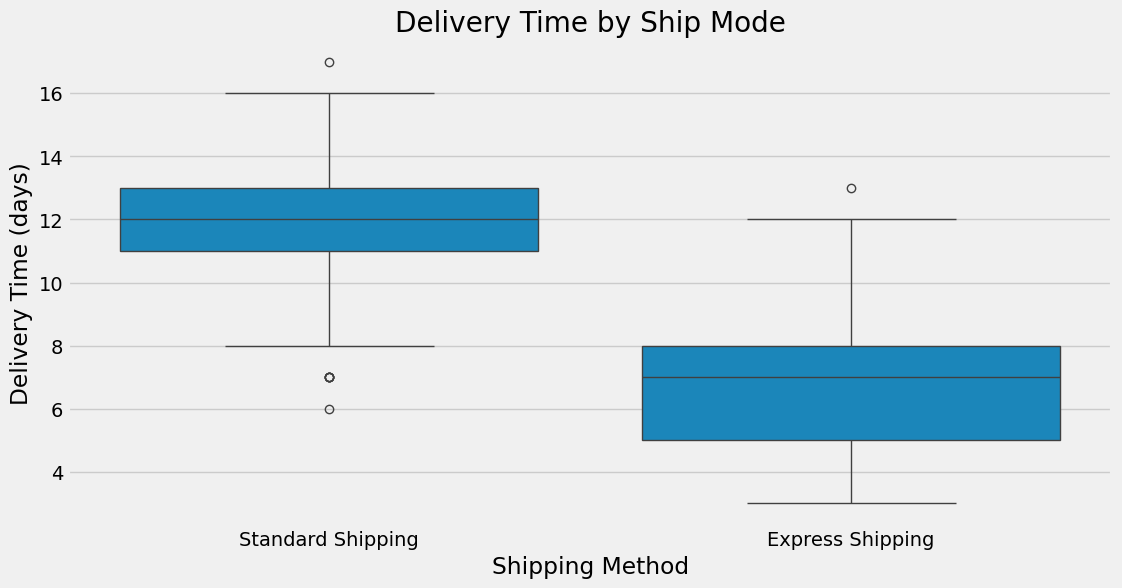

In [12]:
# Boxplot for Delivery Time
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ship Mode', y='Delivery Time', data=Muesli)
plt.title('Delivery Time by Ship Mode')
plt.xlabel('Shipping Method')
plt.ylabel('Delivery Time (days)')
plt.show()

<Figure size 1000x600 with 0 Axes>

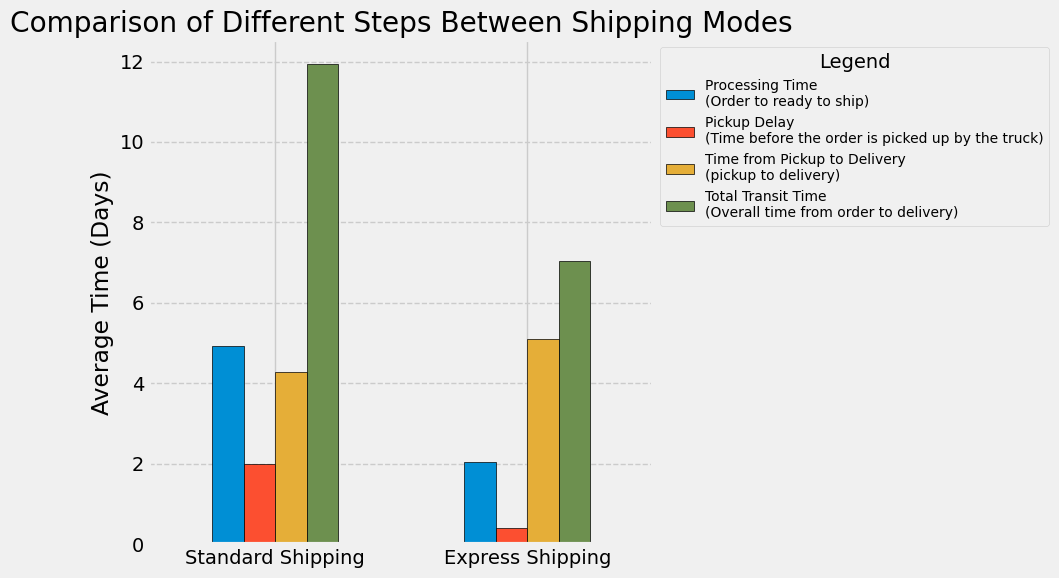

In [13]:
# Mean times for each step
mean_data = {
    'Processing Time\n(Order to ready to ship)': [2.04, 4.93],
    'Pickup Delay\n(Time before the order is picked up by the truck)': [0.40, 1.99],
    'Time from Pickup to Delivery\n(pickup to delivery)': [5.10, 4.29],  # New data
    'Total Transit Time\n(Overall time from order to delivery)': [7.05, 11.93]
}

# Ship Modes
ship_modes = ['Express Shipping', 'Standard Shipping']

# Convert to DataFrame for easier plotting
import pandas as pd
mean_df = pd.DataFrame(mean_data, index=ship_modes)

# Reorder the DataFrame to have Standard Shipping first
mean_df = mean_df.loc[['Standard Shipping', 'Express Shipping']]

# Plotting the mean times
plt.figure(figsize=(10, 6))
mean_df.plot(kind='bar', edgecolor='black', figsize=(10, 6))

# Customize the plot
plt.title('Comparison of Different Steps Between Shipping Modes')
plt.ylabel('Average Time (Days)')
plt.xticks(rotation=0)
plt.grid(True, axis='y', linestyle='--')

# Customize the legend with short explanations
plt.legend(title="Legend", loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

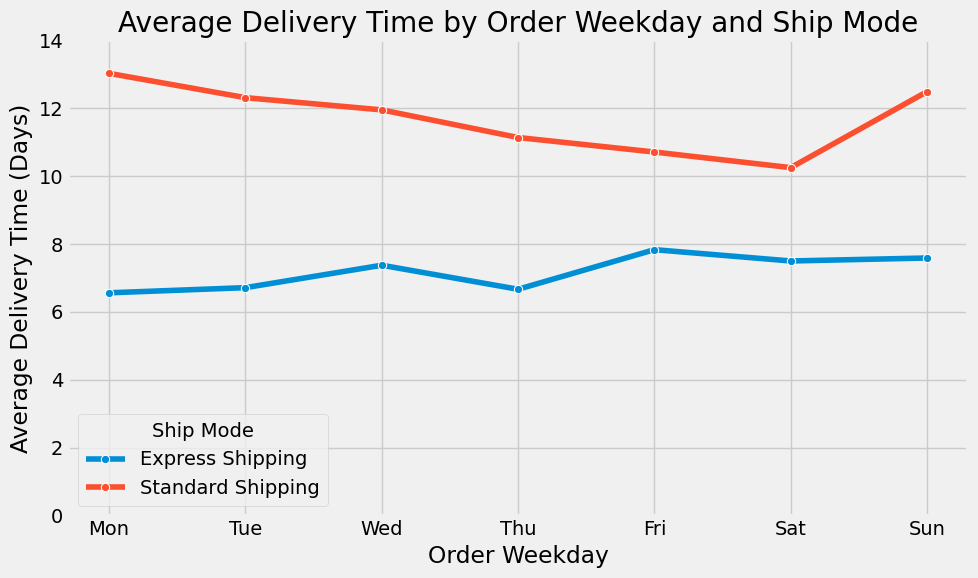

,order_weekday,Ship Mode,Delivery Time
0,0,Express Shipping,6.56
1,0,Standard Shipping,13.03
2,1,Express Shipping,6.71
3,1,Standard Shipping,12.31
4,2,Express Shipping,7.38
5,2,Standard Shipping,11.95
6,3,Express Shipping,6.67
7,3,Standard Shipping,11.14
8,4,Express Shipping,7.83
9,4,Standard Shipping,10.71


In [14]:

# Prepare data
weekday_delivery = Muesli.groupby(['order_weekday', 'Ship Mode'])[['Delivery Time']].mean().reset_index()

# Create a single plot for "Delivery Time"
plt.figure(figsize=(10, 6))

# Line plot for delivery time by weekday and shipping mode
sns.lineplot(data=weekday_delivery, x='order_weekday', y='Delivery Time', hue='Ship Mode', marker="o")

# Set x-axis labels for days of the week
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Add labels and title
plt.title('Average Delivery Time by Order Weekday and Ship Mode')
plt.ylabel('Average Delivery Time (Days)')
plt.ylim(0, 14)
plt.xlabel('Order Weekday')
# Add grid lines and adjust layout
plt.grid(True)
plt.legend(title="Ship Mode")
plt.tight_layout()

# Show the plot
plt.show()

weekday_delivery = Muesli.groupby(['order_weekday', 'Ship Mode'])['Delivery Time'].mean().reset_index()
weekday_delivery

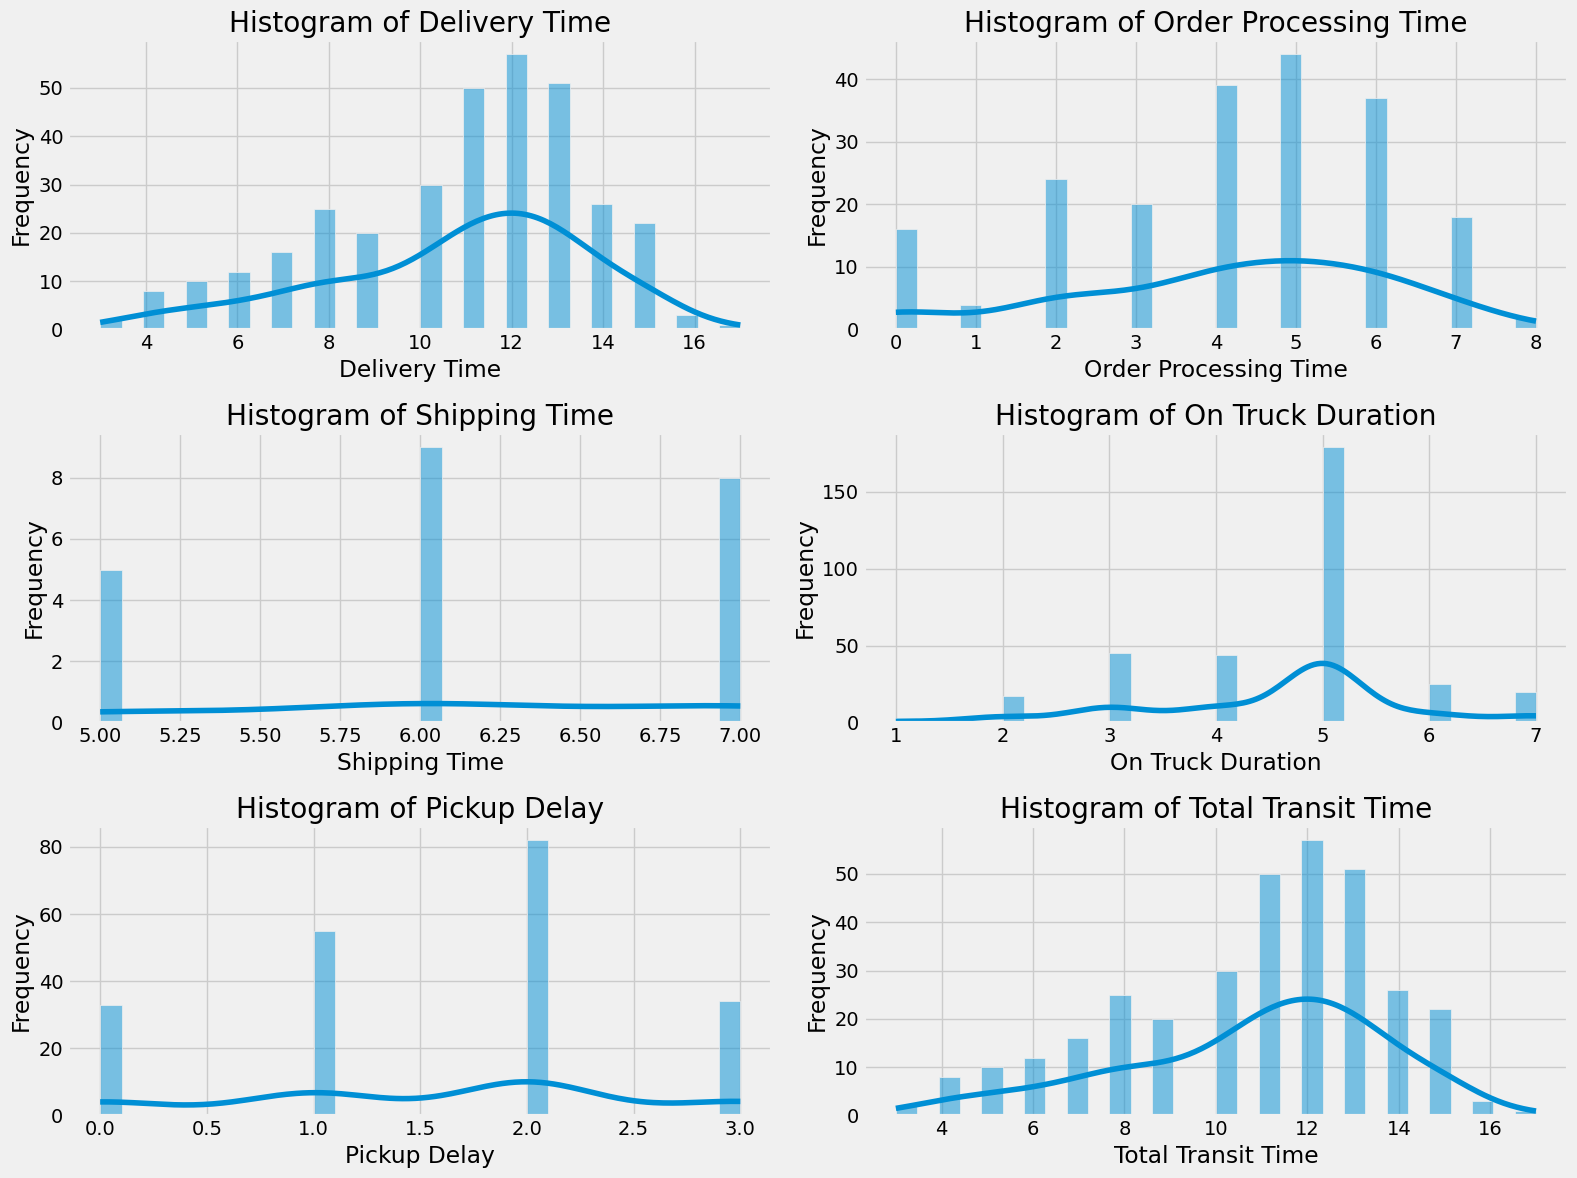

In [15]:
# List of columns to plot histograms for
columns_to_plot = [
    'Delivery Time', 
    'Order Processing Time', 
    'Shipping Time', 
    'On Truck Duration', 
    'Pickup Delay', 
    'Total Transit Time',
]

# Plot histograms for each column
plt.figure(figsize=(16, 12))
for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 2, i + 1)  # Create a 3x2 grid of subplots
    sns.histplot(Muesli[column], bins=30, kde=True)  # Using kde=True to show the kernel density estimate
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

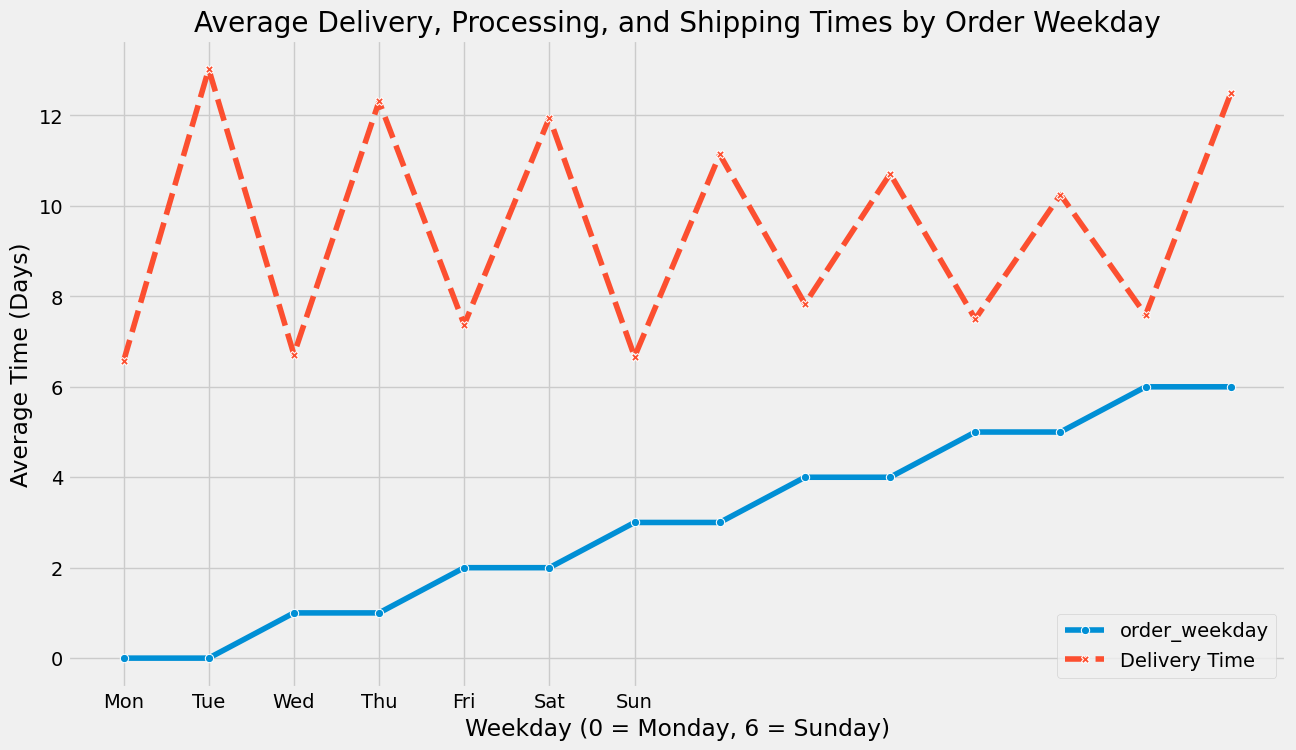

In [16]:
# Plot the results
plt.figure(figsize=(14, 8))
sns.lineplot(data=weekday_delivery, markers=True)
plt.title('Average Delivery, Processing, and Shipping Times by Order Weekday')
plt.xlabel('Weekday (0 = Monday, 6 = Sunday)')
plt.ylabel('Average Time (Days)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Rename weekdays
plt.grid(True)
plt.show()
